<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:** 
Tina Liu, Zaria Rankine

### Business Problem

We explored air quality data for different boroughs of London, in an aim to provide insights useful to potential house buyers. We decided our stakeholders would be property websites like Rightmove and Zoopla, as they often provide area guides for their customers being house buyers.

### Application

We explored the London Borough data, and formed hypotheses around these findings. We used the BreezoMeter API with hourly Air Quality reports, and the London Borough Demographics Data CSV. We also used MapBox API for latitude and longitude coordinates for our broughs. We defined Air Quality using the Air Quality Index (AQI) score from BreezoMeter, based on the coordinates given from MapBox.

Before we started exploring our data, we decided to treat each borough as a distinct area with indivual characteristics to reflect the socioeconimic differences between areas in London, which may not be obvious to those moving new to the area.


The CSV had 85 columns for the 32 London boroughs, and we performed EDA to determine areas of interest for our hypothesis. As we had lots of choice, we prioritised variables that would compare boroughs by real-life standards. This analysis showed there were noticable differences and trends between variables, so we tested to find if these differences were also reflected in the air quality. 

We also wanted to pick variables with reasonably different values for each borough, to ensure we were comparing adequately differnet areas. For example, the values for Happiness Score ranged between 5.9 and 7.6, despite the scale going from 1 - 10. We didn't feel the difference in values were substantial enough to oppose the boroughs for comparison.

We chose to select the boroughs with most and least green space, highest and lowest average house prices, and grouped the data by inner and outer London, and by Labour and Conservative constituencies.

### Analysis
#### Data Loading & Cleaning

Our entire dataset consists of data on the boroughs of London combined with air quality data, to advise potential homebuyers or renters moving to Greater London.


##### London Borough Data

The borough related data contains 85 columns, including lots of demographic data. We kept 19 columns which we think would be of interest given our target customers. These columns can be grouped into:

##### (1) potential drivers of air quality

- Population density (per hectare) 2016
- % of area that is Greenspace, 2005
- Total carbon emissions (2013)
- Number of cars, (2011 Census)

##### (2) factual info that potential homebuyers would be interested to know

- Unemployment rate (2015)
- Number of active businesses, 2014
- Crime rates per thousand population 2014/15
- Median House Price, 2014
- Average Band D Council Tax charge (£), 2015/16
- Rented from Local Authority or Housing Association, (2014) %
- Average Public Transport Accessibility score, 2014
- Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14
- Political control in council

##### (3) Survey data of residents

- Life satisfaction score 2011-14 (out of 10)
- Happiness score 2011-14 (out of 10)
- Anxiety score 2011-14 (out of 10)


##### Air Quality Data 

We are using the Breezo Air Quality Index data as measure of air quality, and we're accessing the data via the Breezo API. The Breezo Air Qaulity Index is an in-house produced global measure of air quality index, combining national AQI index, academic research and latest real-time data. As air quality data is dynamic and fast-changing, Breezo is able to provide a hourly basis measure of air quality data, which can be different at any given time from street to street. if pollution levels are low in the morning, things might dramatically change in just a couple of hours. 

The Breezo Air Quality Data Scale puts air quality on a scale of 0 to 100, 0 to 19 being Poor air quality and 100 being best air quality.

- 0 to 19 Poor
- 20 to 39 Low
- 40 to 50 Moderate
- 60 to 79 Fair
- 100 Exellent

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

import api
import data_cleaning as dc
import hypothesis_tests as ht
import visualizations as vis

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
#Import data
df = dc.full_clean()
# borough_data = pd.read_csv('./data/borough_data_cleaned_coordi.csv',index_col=0)

In preparing the data, we first load the original Kaggle dataset (read csv), keep the columns we are interested in and call Mapbox API to get the coornidates of each borough - we have one set of coordinates for each borough, which the Mapbox defines as the centre of that borough.

In getting the Air Quality data from the Breezo API, due to the limiation of the API calls capped at 1000 daily, and we have 33 boroughs in London that we are interested in. The maximum we can pull at one time is 24 hours worth of air quality data for all 33 boroughs, we can save this in a csv file and we will read from the csv file for the last 24 hours of air quality data for each borough (as of 2019-Nov-12).

In [7]:
# RUN THIS ONLY ONCE, afterwards, read_csv
# dc.aqi_data(borough_data, 24)
aqi = pd.read_csv('./data/borough_data_cleaned_aqi.csv',index_col=0)

# after reading the saved aqi data, turn it into a list and calcualte mean and average
aqi.aqi_24 = aqi.aqi_24.map(lambda x: [int(i) for i in x[1:-1].split(', ')])
aqi['aqi_mean'] = aqi.aqi_24.map(lambda x: np.asarray(x).mean())

In [5]:
aqi.head(3)

,code,area,inner_outer,population,unemployment,active_business,crime,house_price,council_tax,council_rental,...,cars,pub_transport,achievement,life,happiness,anxiety,political,coordi,aqi_24,aqi_mean
0,E09000001,City of London,Inner London,28.9,.,19250,.,765000,943,.,...,1692,7.9,78.6,6.59,5.99,5.57,.,"[[51.513988, -0.104885]]","[69, 70, 65, 57, 76, 71, 74, 79, 78, 81, 81, 8...",74.666667
1,E09000002,Barking and Dagenham,Outer London,57.3,11,5690,83.4,215000,1332,35.9,...,56966,3.0,58.0,7.14,7.05,3.05,Lab,"[[51.55903, 0.155831]]","[79, 75, 67, 72, 68, 74, 79, 78, 79, 85, 84, 8...",78.416667
2,E09000003,Barnet,Outer London,44.5,8.5,24555,62.7,400000,1397,11.1,...,144717,3.0,67.3,7.48,7.37,2.75,Cons,"[[51.658724, -0.190878]]","[82, 83, 85, 89, 88, 89, 87, 87, 89, 87, 84, 8...",86.375000


#### EDA including graphs
Looking for interesting relationships that we could group the data by and test the air quality difference in between the two groups.

- Boroughs with a Labour seat generally cost less, but given the number boroughs with either seat aren't equal we would like to explore further
- Air quality in Outer London Boroughs have a wider range but boroughs with the best air quality is all in Outer London.

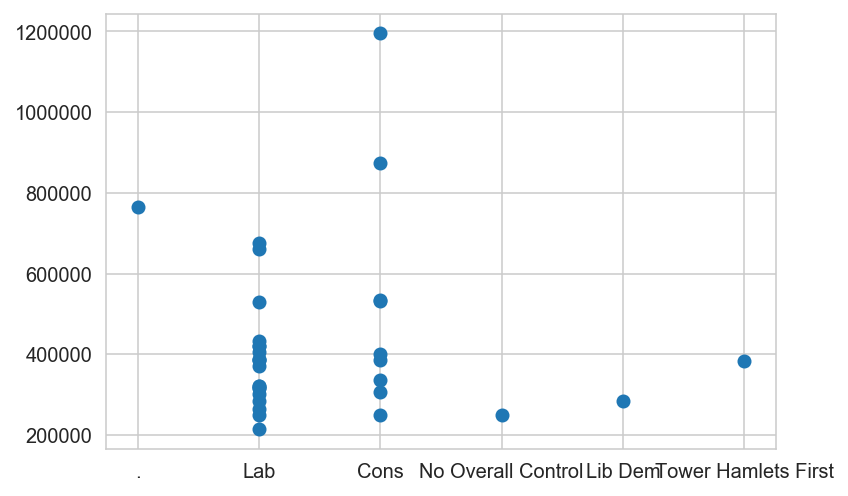

In [6]:
# plt.scatter(aqi.house_price, aqi.anxiety)
plt.scatter(aqi.political, aqi.house_price)

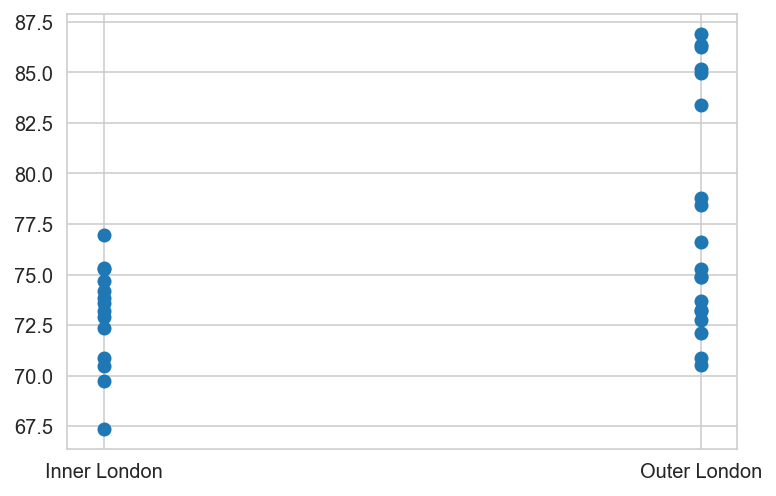

In [7]:
plt.scatter(aqi.inner_outer, aqi.aqi_mean)

In [98]:
#Most and Least GreenSpace
df_green = df.sort_values(by=['greenspace'],ascending=False)
df_green['area'].iloc[0], df_green['area'].iloc[-1]

('Havering', 'City of London')

In [99]:
#Highest and Lowest House Price
df_price = df.sort_values(by=['house_price'],ascending=False)
df_price['area'].iloc[0], df_price['area'].iloc[-1]

('Kensington and Chelsea', 'Barking and Dagenham')

#### Hypotheses TESTING

##### Hypotheses 1:

- H0: Air quality of boroughs in Inner London = Air quality of boroughs in Outer London
- H1: Air quality of boroughs in Inner London != Air quality of boroughs in Outer London

Inner London and Outer London are defined by the borough dataset. Before we conduct the hypothesis, we need to get all the air quality data for all Inner London boroughs into one array, similary for Outer Boroughts. We have 14 inner city boroughs, 19 outer city boroughs, each with 24 air quality data point observed over last 24hours.

size of Inner London 336
size of Outer London 456
Inner London  mean, std, var are:  (72.91369047619048, 7.0648562280659775, 49.912193523242635)
Outer London  mean, std, var are:  (77.80701754385964, 8.14439554689319, 66.33117882425361)
Welch t-stat is 9.013 degree of freedom is 769.137
p-value is:  0.0

Based on the p value of 0.0 and our aplha of 0.01 we reject  the null hypothesis.
Due to these results, we  can state that there is a difference between Inner London
and Outer London
with an effect size, cohen's d, of -0.635 and power of 1.0.


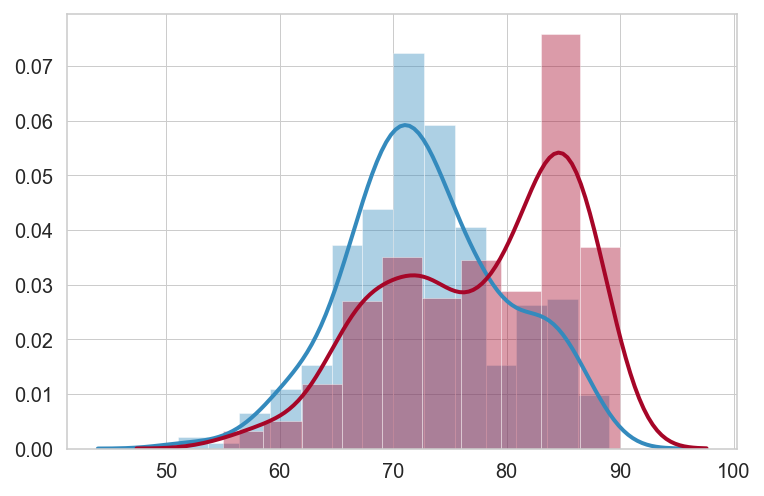

In [41]:
# hypothesis testing using full set of original air quality data from API
status, coh_d_orig = ht.hypothesis_test_group('inner_outer','Inner London','Outer London', two_sided = True, alpha = 0.01,
                          sampling = False)


The distribution of the two samples are not quite normal distributions, especially the Outer London sample. Also its not clear the variance are the same between two samples.

Given that we have around 300 to 450 data points, we will conduct random samples, calculated the mean and use the sample means for our t-test. As by central limit theorem the sample means should follow a normal distribution and hence satisfy the normality assumption for t-tests.

size of Inner London 1000
size of Outer London 1000
Inner London  mean, std, var are:  (72.90772, 0.9836753537626122, 0.9676172016000003)
Outer London  mean, std, var are:  (77.80344000000001, 1.1530600012141607, 1.3295473664000002)
Welch t-stat is 102.095 degree of freedom is 1949.604
p-value is:  0.0

Based on the p value of 0.0 and our aplha of 0.01 we reject  the null hypothesis.
Due to these results, we  can state that there is a difference between Inner London
and Outer London
with an effect size, cohen's d, of -4.568 and power of 1.0.


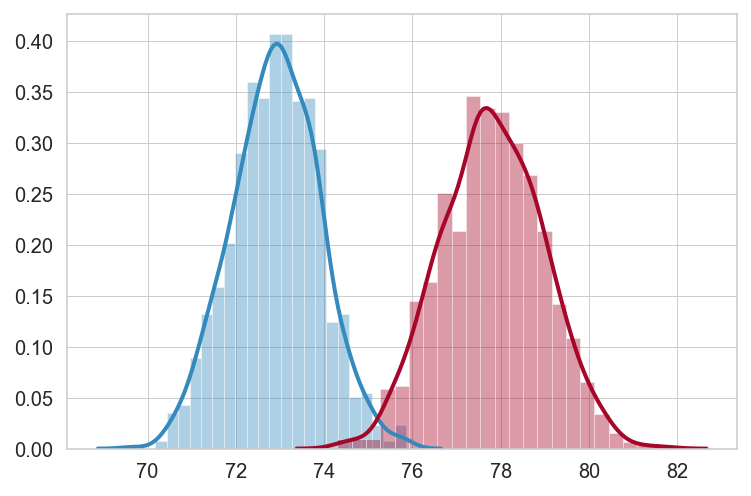

In [42]:
# hypothesis testing using sample means
status, coh_d_sampled = ht.hypothesis_test_group('inner_outer','Inner London','Outer London', two_sided = True, alpha = 0.01,
                          sampling = True, sample_size=1000)

By taking sample means of the actual air quality data, we are much more comfortable with the normality assumption (as shown by the density plot above).

For hypothesis testing, we will use the Welch's T-test as although the sample size n is the same, the population variance of inner london and outer london may or may not be the same. While assuming the population variance is the same (student t-test) seems reasonable as inner london and outer london are still close together. Welch's t-test just offers flexibility than student t-test.

------

Given that we have a near zero p-value meaning even if we set alpha (Type I error) rate to be 1%, we can still reject the Null hypothesis that air quality is the same between Inner London boroughs and Outer London boroughs. Note power is also near 100% as well.

----------


NOTE: As the p-value was near zero. We also SENSE checked the calculation with Student t-test using ttest_ind, result was similar to above.

- on the original data sample set, pvalue is very small already, for example, pvalue=7.111555995065837e-18
- on the sample mean dataset, pvalue is zero


In [11]:
print('effect_size of original data:',coh_d_orig)
print('effect_size of sample means:',coh_d_sampled)

effect_size of original data: -0.6350925257573231
effect_size of sample means: -4.382280517321839


While observing significant p-value means we can reject the null hypothesis that there is no different in air quality betwen Inner London boroughs and Outer London boroughs. We do not know how different they are. For this we look to effect size, which we calculated using Cohen's distance.

We observe that Cohen's d is quite different depending on if we use the original dataset (not normal) or the sample mean dataset. We next look to study the relationship between power and sample size to see how small the sample size can be reduced to while still getting a high power level.

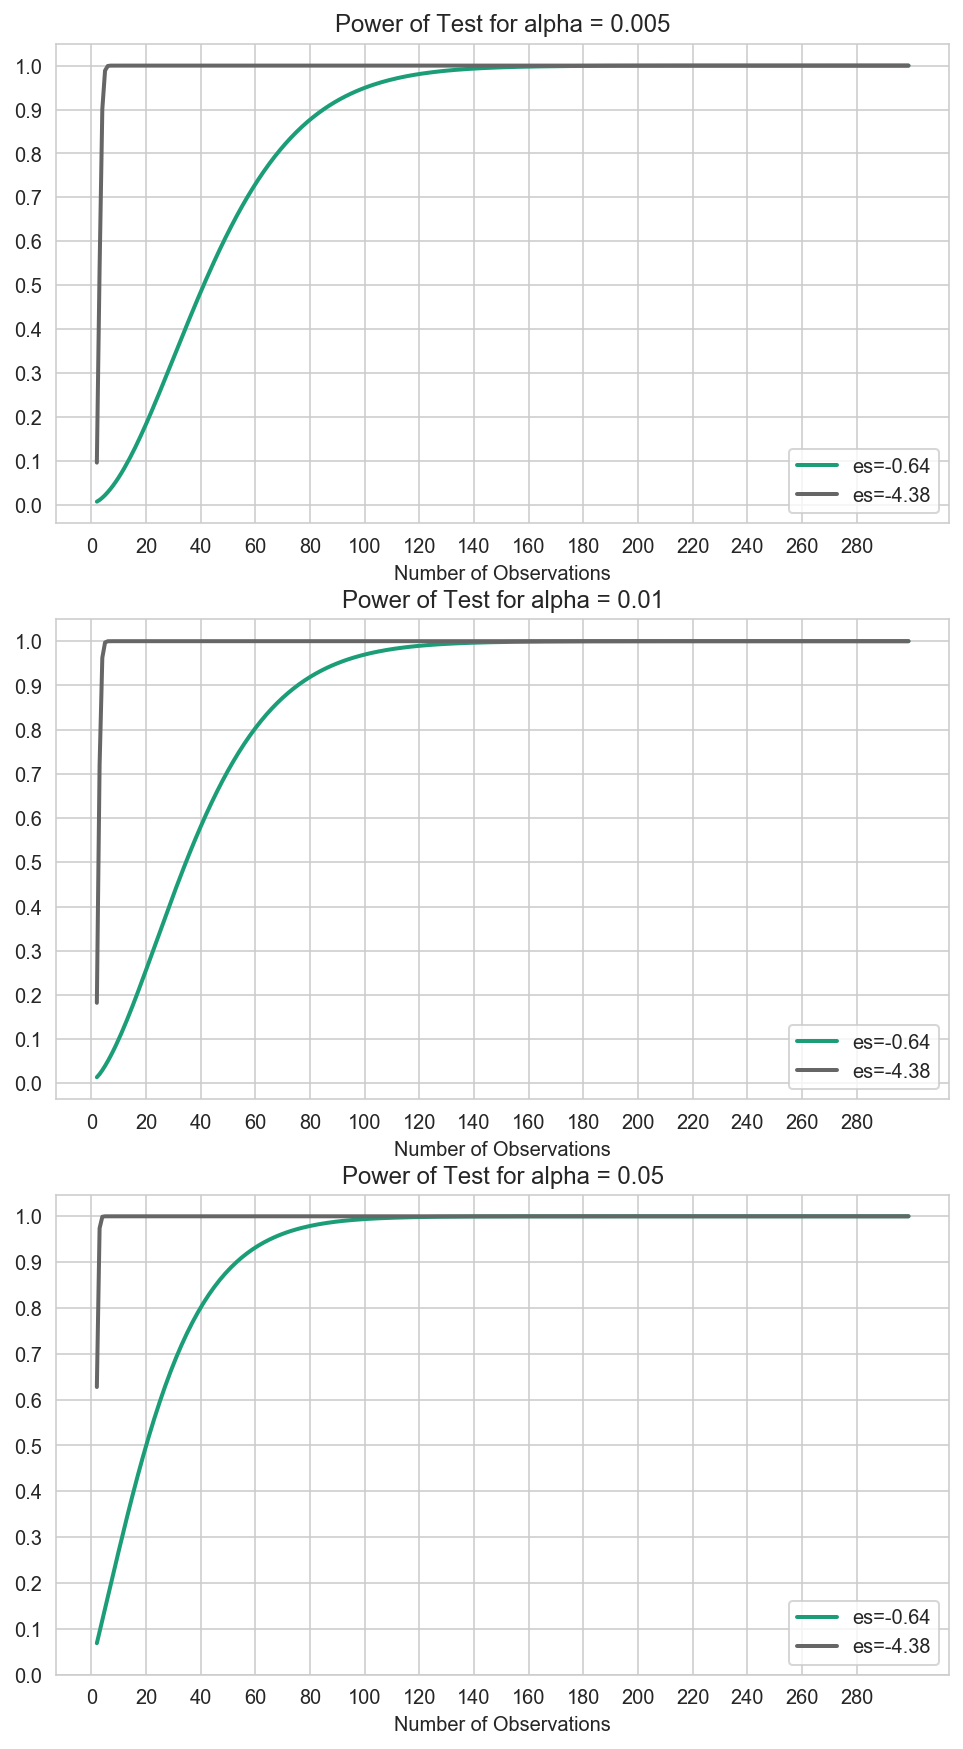

In [15]:
alpha_arr = [.005,.01,0.05]
e_sizes = [coh_d_orig, coh_d_sampled]

vis.power_n_plot(len(alpha_arr), alpha_arr, e_sizes, 300, 20)

#### Hypothesis 2:
- H0: Air quality of Havering = Air quality of City of London
- H1: Air quality of Havering > Air quality of City of London

We selected the boroughs with highest and lowest Greenspace, and collected data from the last five days from our API. We then took random samples of 50 and took the mean, and repeated this 1000 times.

As our P-Value is less than our alpha value, we are acceting the rejecting Hypothesis, H0, and concluding that there is a significant difference between samples. 
Our Cohen's D value shows a high effect size, and our visualisations show there is no amount of overlap between samples.

In [12]:
#Call API for each Borough, last 120hrs of air quality data
x1 = ht.generate_datapoints('Havering')
x2 = ht.generate_datapoints('City of London')

In [13]:
# Find mean, variance and standard deviation of each sample
ht.sample_mu_std_var(x1), ht.sample_mu_std_var(x2)

((82.10924369747899, 7.195691890356874, 51.77798178094768),
 (69.07563025210084, 10.077981377061366, 101.56570863639573))

In [14]:
#Check samples are of the same length
len(x1) == len(x2)

True

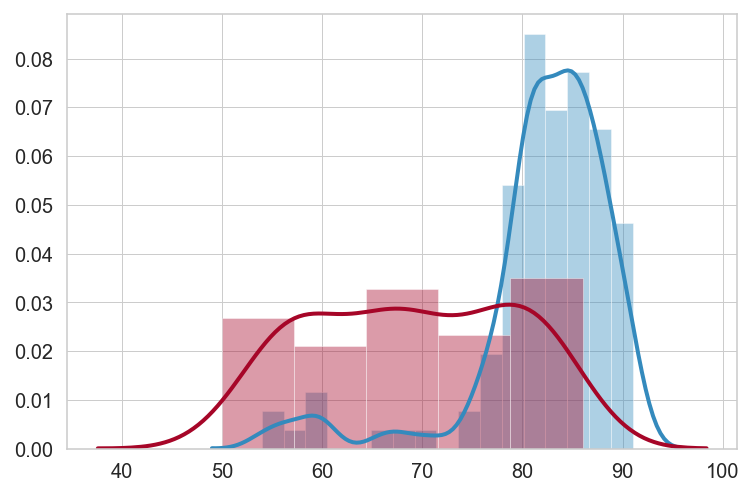

In [15]:
#Visually inspecting the distributions for differences in mean and standard deviation
vis.distplots(x1, x2)

In [16]:
#Take random sample of 50, calculate the mean, repeated 1000 times
x1_s = ht.create_sample_means(x1,1000)
x2_s = ht.create_sample_means(x2,1000)

In [17]:
#Compare new mean, standard deviation and variance
ht.sample_mu_std_var(x1_s), ht.sample_mu_std_var(x2_s)

((82.10232, 0.9958507004566497, 0.9917186175999998),
 (69.11648, 1.3874980394941103, 1.9251508095999998))

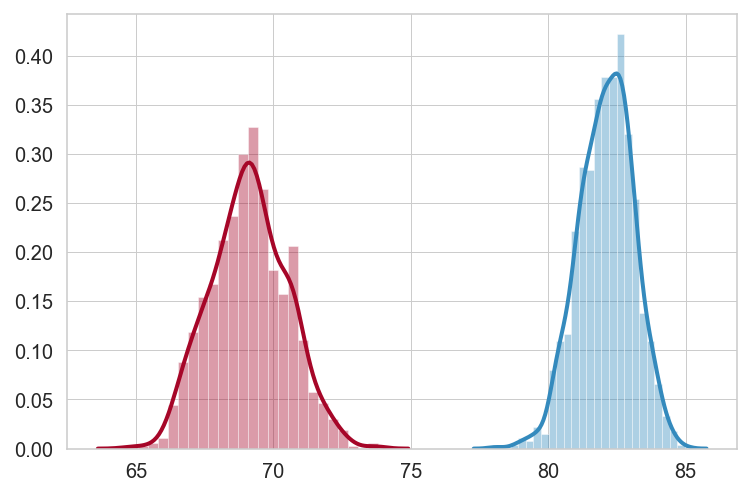

In [18]:
#Visually inspecting the new distributions
vis.distplots(x1_s, x2_s)

In [19]:
#Finding the T Value and P Value
stat = ht.twosample_tstatistic(x1_s, x2_s)
ht.print_stats(stat)

T-Stat:  240.32242489071143  P-Val:  0.0


In [20]:
#Calculate effect size
ht.Cohen_d(x1_s, x2_s)

10.752923377941235

In [21]:
#Assign averages to variables
x1m = np.mean(x1_s)
x1s = np.std(x1_s)
x2m = np.mean(x2_s)
x2s = np.std(x2_s)

x2m

69.11648

In [22]:
#Create normal distributions from mean and std of each sample
x1n = ht.normals(x1m, x1s)
x2n = ht.normals(x2m, x2s)

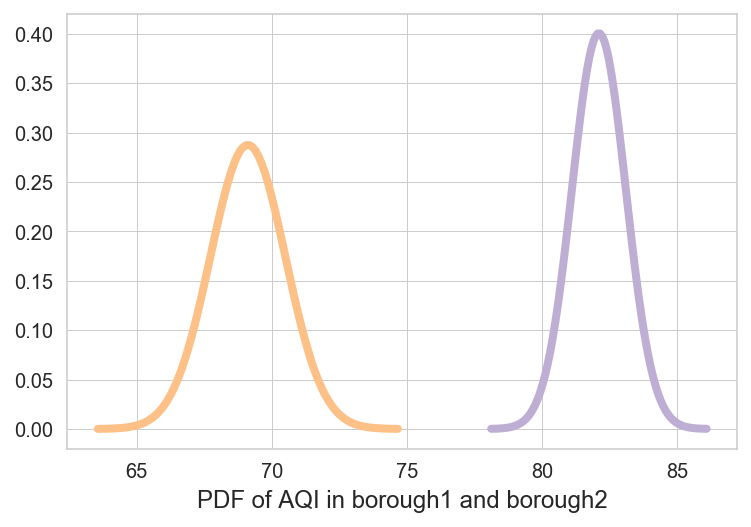

In [44]:
#Plotting PDF 
vis.pdf_plot('Havering', 'City of London', x1n, x2n)

In [24]:
#Compare P Value and Alpha 
p_val = stat.pvalue
alpha = 0.05
ht.compare_pval_alpha(p_val, alpha)

'Reject'

#### Hypothesis 3:
- H0: Air quality of Kensington and Chelsea = Air quality of Barking and Dagenham
- H1: Air quality of Kensington and Chelsea > Air quality of Barking and Dagenham

We selected the boroughs with highest and lowest House Price, and collected data from the last five days from our API. We then took random samples of 50 and took the mean, and repeated this 1000 times.

As our P-Value is less than our alpha value, we are acceting the rejecting Hypothesis, H0, and concluding that there is a significant difference between samples. 
Our Cohen's D value shows a high effect size, though our visualisations show there is a decent amount of overlap between samples.

In [25]:
#Call API for each Borough
xx1 = ht.generate_datapoints('Kensington and Chelsea')
xx2 = ht.generate_datapoints('Barking and Dagenham')

In [26]:
#Check samples are of the same sizw
len(xx1) == len(xx2)

True

In [27]:
# Find mean, variance and standard deviation of each sample
ht.sample_mu_std_var(x1), ht.sample_mu_std_var(x2)

((82.10924369747899, 7.195691890356874, 51.77798178094768),
 (69.07563025210084, 10.077981377061366, 101.56570863639573))

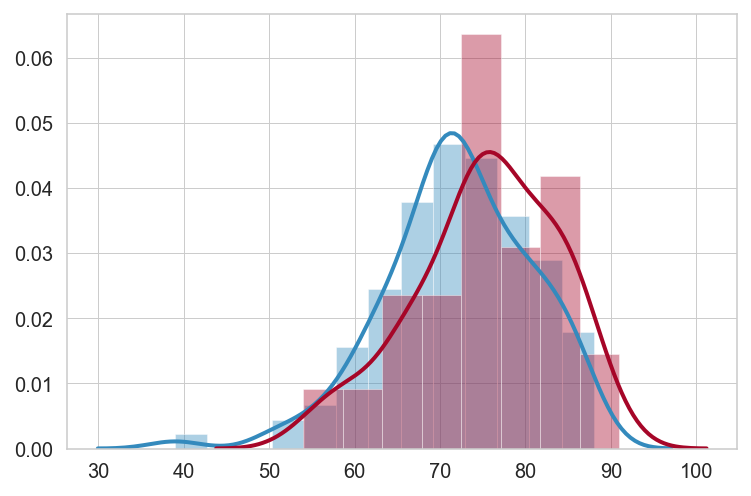

In [28]:
#Visually inspecting the distributions for differences in mean and standard deviation
vis.distplots(xx1, xx2)

In [29]:
# taking random sample of size 50, calculating the mean, repeating this 1000 times
xx1_s = ht.create_sample_means(xx1,1000)
xx2_s = ht.create_sample_means(xx2,1000)

In [30]:
#Compare new mean, standard deviation and variance
ht.sample_mu_std_var(xx1_s), ht.sample_mu_std_var(xx2_s)

((72.16297999999999, 1.2616343050186927, 1.5917211195999994),
 (75.31046, 1.1740343216448144, 1.3783565883999993))

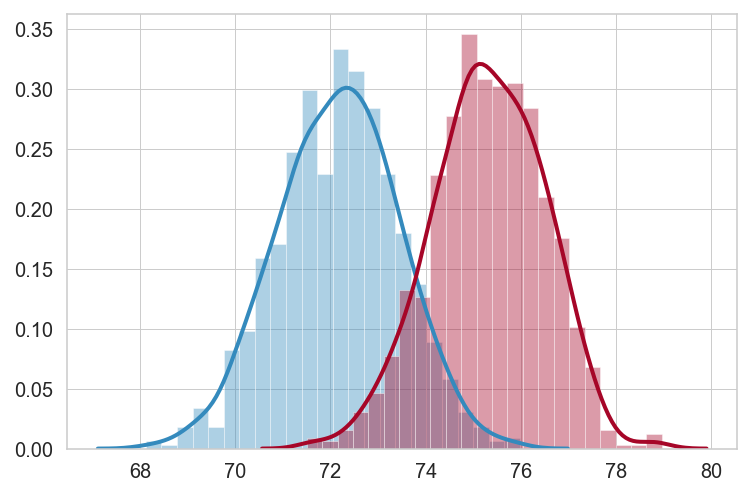

In [31]:
#Visually inspecting the new distributions
vis.distplots(xx1_s, xx2_s)

In [32]:
#Finding the T Value and P Value
stats = ht.twosample_tstatistic(xx1_s, xx2_s)
ht.print_stats(stat)

T-Stat:  240.32242489071143  P-Val:  0.0


In [33]:
#Calculate effect size
ht.Cohen_d(xx1_s, xx2_s)

-2.5828195848927185

In [34]:
#Assign averages to variables
xx1m = np.mean(xx1_s)
xx1s = np.std(xx1_s)
xx1gm = np.mean(sum(xx1) + sum(xx2)) / len(xx1) + len(xx2)
xx2m = np.mean(xx2_s)
xx2s = np.std(xx2_s)

In [35]:
#Create normal distributions from mean and std of each sample
xx1n = ht.normals(xx1m, xx1s)
xx2n = ht.normals(xx2m, xx2s)

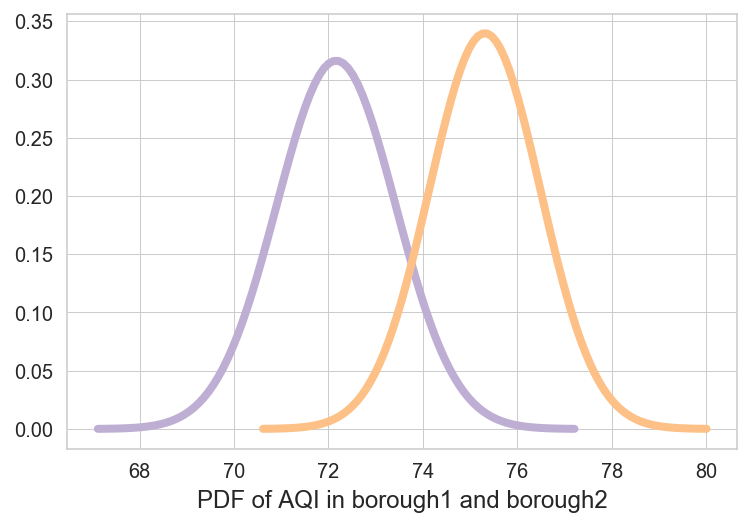

In [36]:
#Plotting PDF 
vis.pdf_plot('Kensington and Chelsea', 'Barking and Dagenham', xx1n, xx2n)

In [37]:
#Compare P Value and Alpha 
p_val = stat.pvalue
alpha = 0.05
ht.compare_pval_alpha(p_val, alpha)

'Reject'

In [38]:
from scipy.stats import t
# define probability
p = 0.95
df = len(xx1_s)
# retrieve value <= probability
crit_value = t.ppf(p, df)
print(crit_value)
# # confirm with cdf
# p = t.cdf(value, df)
# print(p)

1.6463788172854639


#### Hypothesis 4:

- H0: Air quality of Conservative boroughs = Air quality of Labour boroughs
- H1: Air quality of Conservative boroughs != Air quality of Labour boroughs

Consituency information is given in the borough dataset. 

We took 24 hours of data for each borough, and grouped it depending on political seat. We saved this as a csv for efficiency. We first looked at the distribution of the two samples to check for normality assumption. It looks like both Labour group and Conservative group both contain two sub distributions (maybe normal) as evident in the two peaks in the graphs. The two peak distribution looks similar to the distribution of Outer London seen earlier. 

We decide not to sample here as sampling would push the distributions together into a peak and maybe in this political party group split, the underlying is indeed made up of two sub-distributions.

size of Lab 480
size of Cons 216
Lab  mean, std, var are:  (75.8875, 8.040771755041098, 64.65401041666668)
Cons  mean, std, var are:  (75.05092592592592, 7.782470751278994, 60.566850994513025)
Welch t-stat is 1.296 degree of freedom is 426.446
p-value is:  0.19568022639602844

Based on the p value of 0.19568022639602844 and our aplha of 0.05 we fail to reject  the null hypothesis.
Due to these results, we  cannot state that there is a difference between Lab
and Cons
.


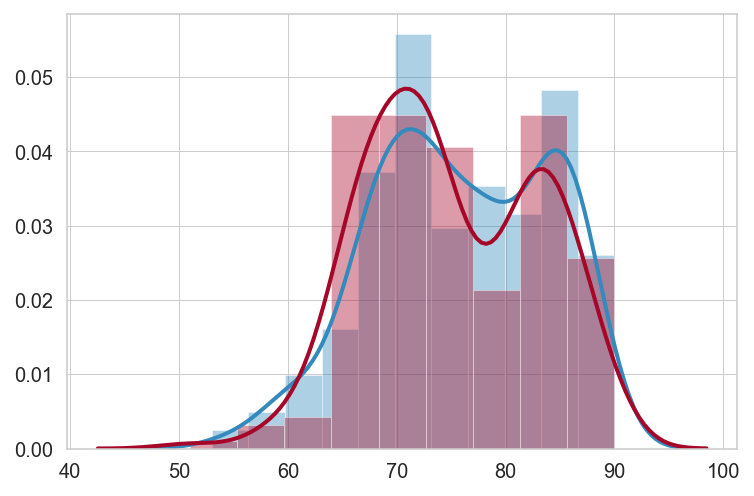

In [39]:
status_pol, coh_d_orig_pol = ht.hypothesis_test_group('political','Lab','Cons', two_sided = True, alpha = 0.05,
                          sampling = False)

We fail to reject the null hypothesis here and hence have to conclude that there is no significant difference between the air quality in boroughs with Labour seat versus conservative Party seat.

#### Advice for Customers

Looking for interesting relationships to advice to target customers.

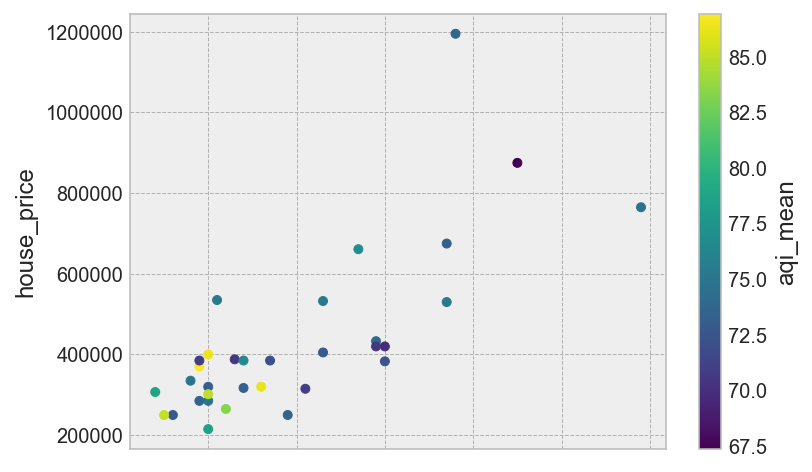

In [8]:
aqi.plot.scatter('pub_transport', 'house_price', c = 'aqi_mean', colormap = 'viridis')

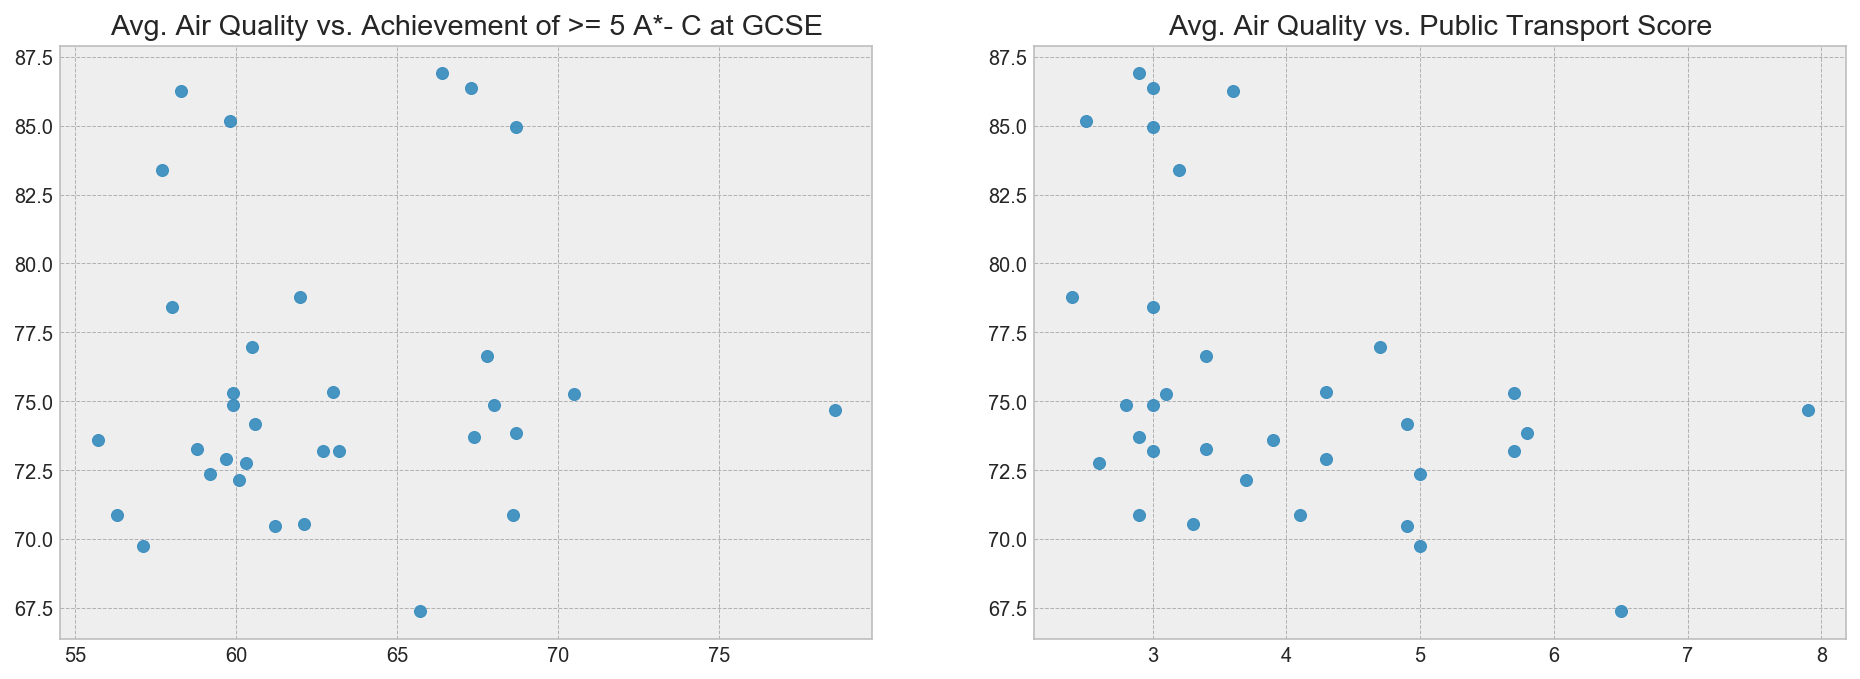

In [10]:
plt.style.use('bmh')
fig = plt.figure(figsize = (16,12))

ax1 = fig.add_subplot(221)
plt.scatter(aqi.achievement, aqi.aqi_mean, alpha=0.9)
plt.title('Avg. Air Quality vs. Achievement of >= 5 A*- C at GCSE')

ax2 = fig.add_subplot(222)
plt.scatter(aqi.pub_transport, aqi.aqi_mean, alpha=0.9)
plt.title('Avg. Air Quality vs. Public Transport Score')

plt.show()

Although we found that better air quality does not mean it has better schools, and for convinience of public transport, boroughs with better air quality actually has a lower public transport score. 

Given that budget is usually set for each customer and it's depended on their situation, we then look at how house price, air quality and school quality combines together.


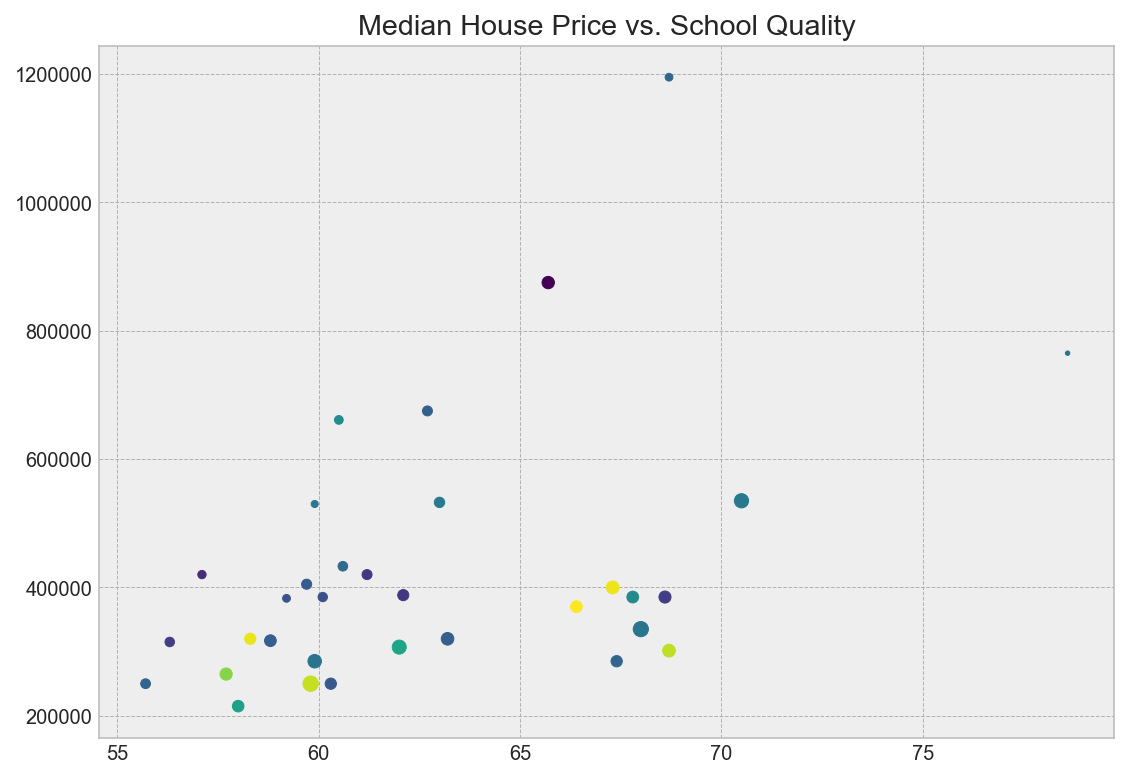

In [28]:
plt.style.use('bmh')
fig = plt.figure(figsize = (20,14))

ax1 = fig.add_subplot(221)
plt.scatter(aqi.achievement, aqi.house_price, c=aqi.aqi_mean, s=aqi.greenspace, cmap = 'viridis')
plt.title('Median House Price vs. School Quality')

plt.show()

#### Findings
Ultimately, we concluded to reject our null hypothesis (H0) for the first three hypothesis and fail to reject for Hypothesis four.

Where our EDA on the borough data showed strong relationships between factors, which we assumed would also be reflected in the AQI. On first inspection, there are noticable differences between samples, and our tests confirmed that many of the differnces are statistically significant. 

#### Limitations

We found a number of physical and theoretical limitations when conducting our experiments.

We could make limited daily calls to our Air Quality API, and only had access to very recent data, minimising the number of calls we could do everyday. To remedy this, we collected multiple coordinates for each borough, and we were able to call hourly API data on each coordinate, generating multiple datapoints for each borough. However, we were unable to collect a consistent number of coordinates for each borough, and ultimately decided against this technique, as to avoid having to weight our samples.

Our process of selecting samples for our experiments was random, but we noticed the method of sampling was inadvertently biased. As we were only able to take samples from the last few days, these cannot be assumed to be an accurate and fair representation of the borough.

Our data could also have a bias due to the nature of the variables. We must question if our boroughs are co-dependent, based on their close physical proximity to each other. We have treated each borough as in independent entitiy, but this could be seen as short-sighted, given that there are no boundaries of air flow between areas.

Random sampling is an assumption of a T-Test, and we recognised that potentially breaching this may affect the reliability of our experiments. However, without more information, we felt our insights were still accurate within the contraints we were working.

Typically, the student's T-Test is used for data with the same sample size and variance. Our sample sizes were consistent for our variables, but didn't have the exact same variance. As we knew our samples were all taken from the same wider population, London, we still felt this was an appropriate test to use, given that when computing our values, this difference in variance can be taken into account.

#### Next Steps
As per our limitations when taking data samples, we would like to perform our tests with a much larger dataset, spanning a longer time period. Doing so would provide more generalised insights, that would better-represent the boroughs.